### Data Description and Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8,6)
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
color = sns.color_palette()

In [2]:
aisles = pd.read_csv('aisles.csv')
departments = pd.read_csv('departments.csv')
orders = pd.read_csv('orders.csv')
order_products_prior = pd.read_csv('order_products__prior.csv')
order_products_train = pd.read_csv('order_products__train.csv')
products = pd.read_csv('products.csv')

##### aisles dataset

In [3]:
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [4]:
aisles.tail()

,aisle_id,aisle
129,130,hot cereal pancake mixes
130,131,dry pasta
131,132,beauty
132,133,muscles joints pain relief
133,134,specialty wines champagnes


In [5]:
len(aisles.aisle.unique())

134

##### departments dataset

In [6]:
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [7]:
departments.tail()

,department_id,department
16,17,household
17,18,babies
18,19,snacks
19,20,deli
20,21,missing


In [8]:
len(departments.department.unique())

21

In [9]:
departments.department.unique()

array(['frozen', 'other', 'bakery', 'produce', 'alcohol', 'international',
       'beverages', 'pets', 'dry goods pasta', 'bulk', 'personal care',
       'meat seafood', 'pantry', 'breakfast', 'canned goods',
       'dairy eggs', 'household', 'babies', 'snacks', 'deli', 'missing'],
      dtype=object)

##### orders dataset

In [10]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [11]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   eval_set                object 
 3   order_number            int64  
 4   order_dow               int64  
 5   order_hour_of_day       int64  
 6   days_since_prior_order  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 182.7+ MB


In [12]:
len(orders.order_id.unique())

3421083

In [13]:
len(orders.user_id.unique())

206209

In [14]:
orders.eval_set.value_counts()

prior    3214874
train     131209
test       75000
Name: eval_set, dtype: int64

In [15]:
orders.order_number.describe().apply(lambda x: format(x, '.2f'))

count    3421083.00
mean          17.15
std           17.73
min            1.00
25%            5.00
50%           11.00
75%           23.00
max          100.00
Name: order_number, dtype: object

In [16]:
order_number = orders.groupby('user_id')['order_number'].max()
order_number = order_number.value_counts()

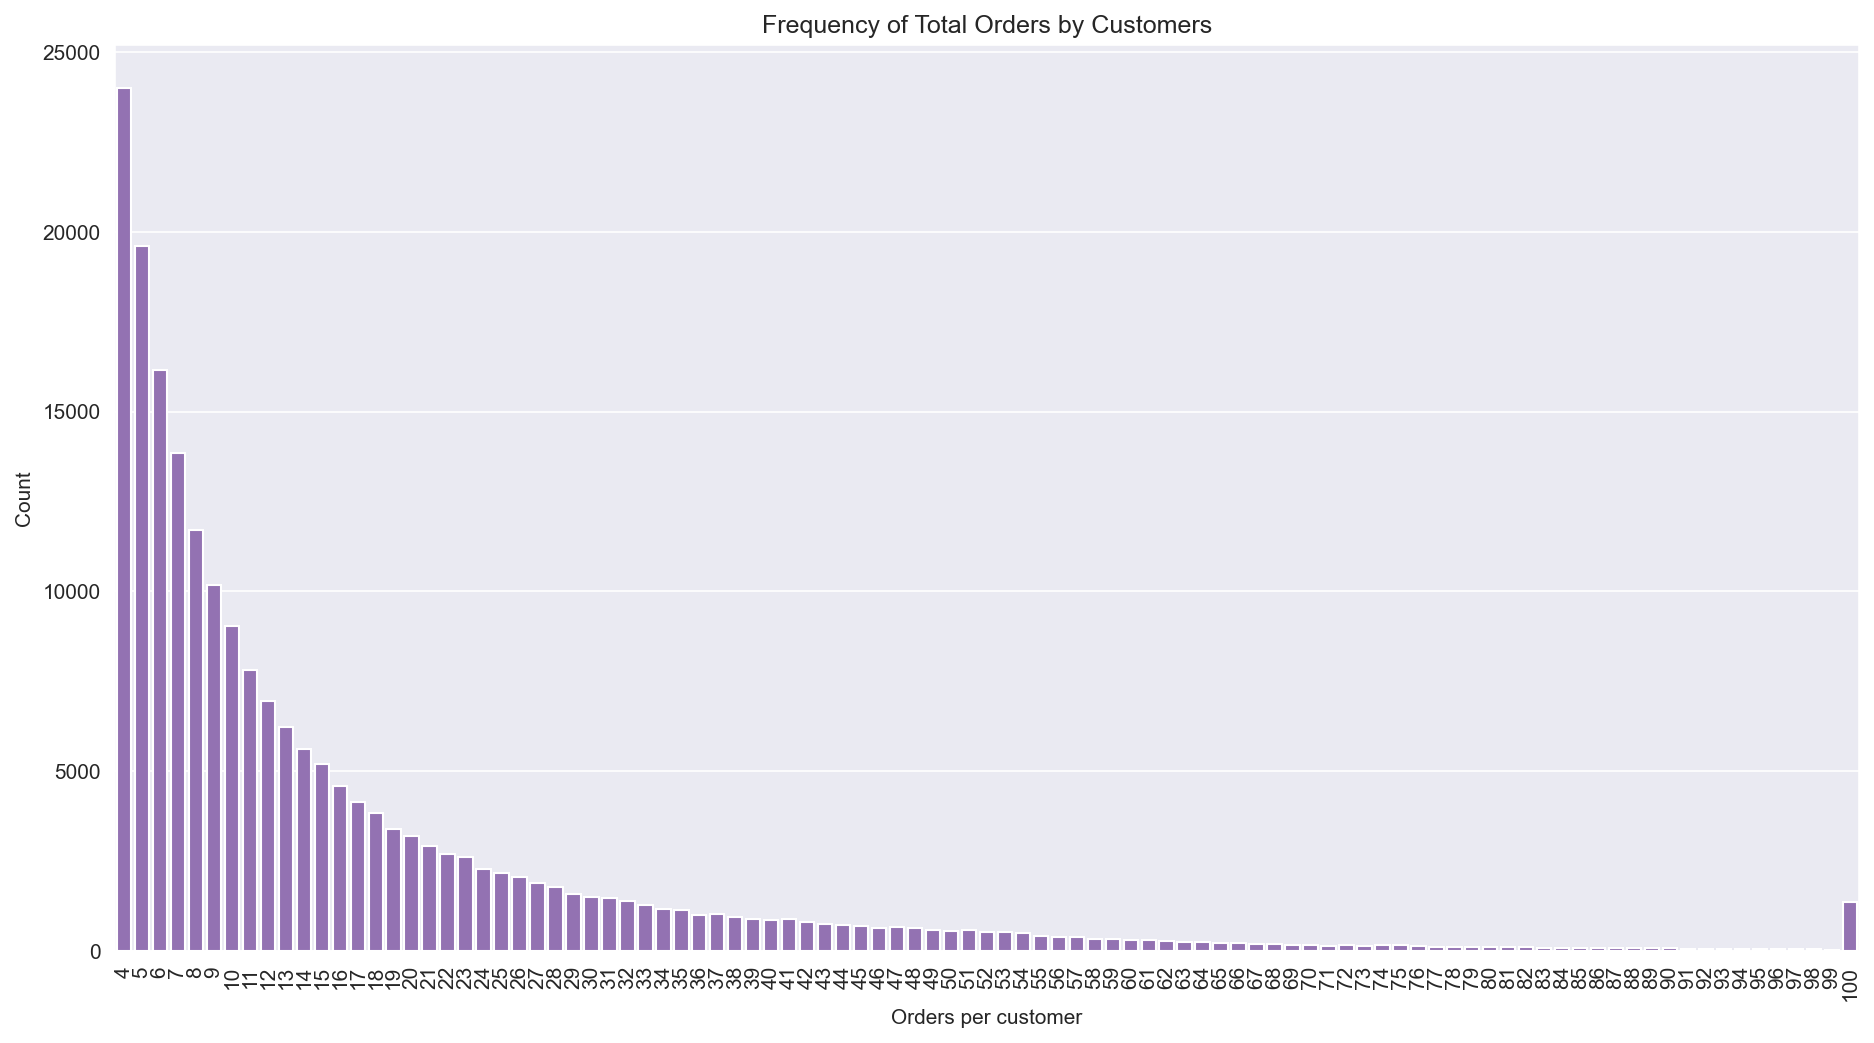

In [17]:
fig, ax = plt.subplots(figsize=(15,8),dpi=150)
ax = sns.barplot(x=order_number.index,y=order_number.values, color = color[4])
ax.set_xlabel('Orders per customer')
ax.set_ylabel('Count')
ax.xaxis.set_tick_params(rotation=90,labelsize=10)
ax.set_title('Frequency of Total Orders by Customers')
fig.savefig('Frequency of Total Orders by Customers.png')

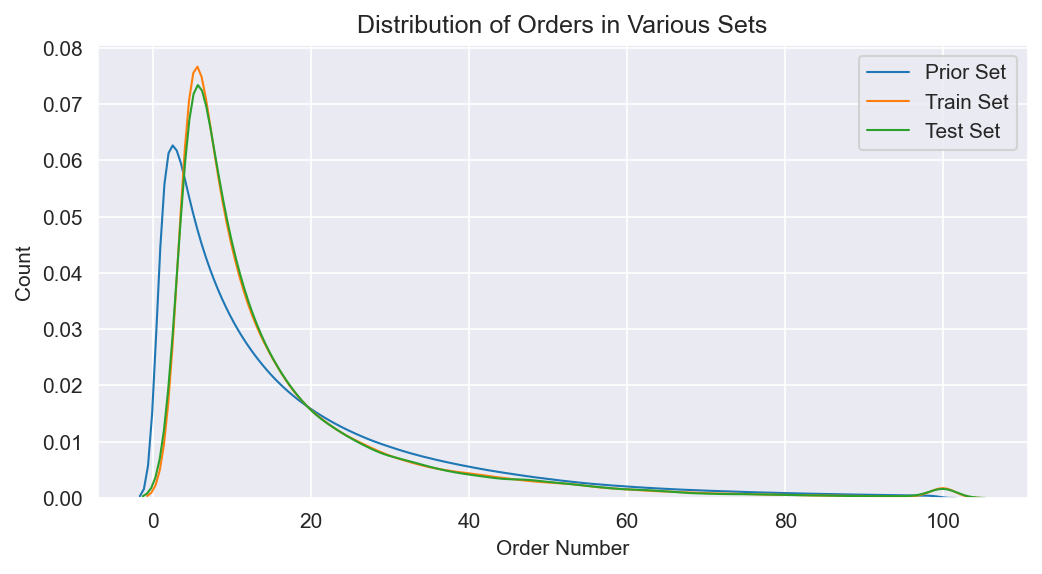

In [18]:
fig,ax = plt.subplots(figsize=(8,4),dpi=150)
ax = sns.kdeplot(orders.order_number[orders.eval_set == 'prior'],label = 'Prior Set', lw = 1)
ax = sns.kdeplot(orders.order_number[orders.eval_set == 'train'],label = 'Train Set', lw = 1)
ax = sns.kdeplot(orders.order_number[orders.eval_set == 'test'],label = 'Test Set', lw = 1)
ax.set_xlabel('Order Number')
ax.set_ylabel('Count')
ax.tick_params(axis='both',labelsize=10)
ax.set_title('Distribution of Orders in Various Sets')
ax.legend()
plt.show()
fig.savefig('Distribution of Orders in Various Sets')

C:\Users\shirl\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


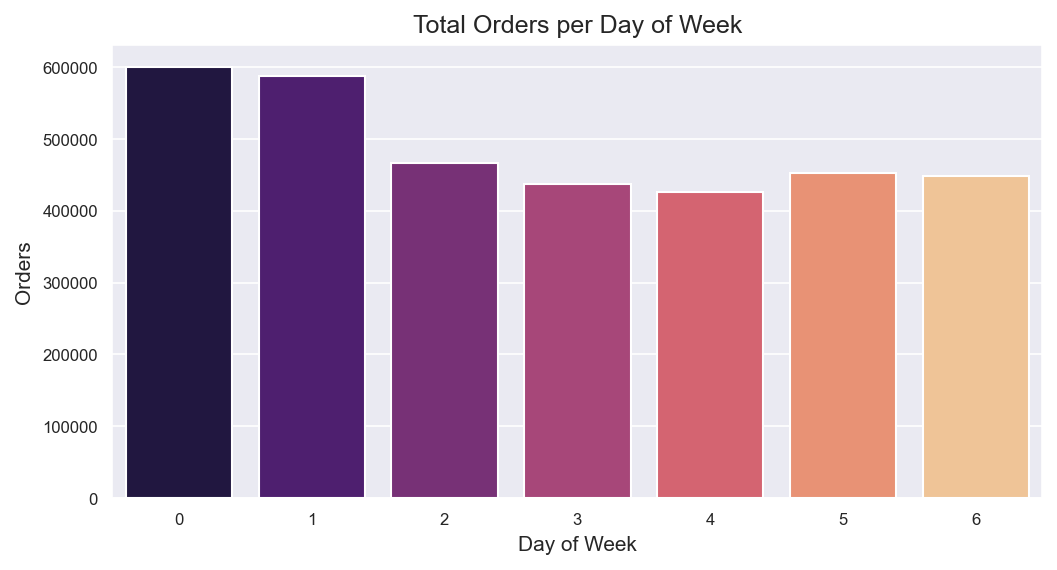

In [19]:
fig,ax = plt.subplots(figsize=(8,4),dpi=150)
ax = sns.countplot(orders.order_dow,palette='magma')
ax.set_xlabel('Day of Week',size=10)
ax.set_ylabel('Orders',size=10)
ax.tick_params(axis='both',labelsize=8)
ax.set_title('Total Orders per Day of Week')
fig.savefig('Total Orders per Day of Week.png')
plt.show()

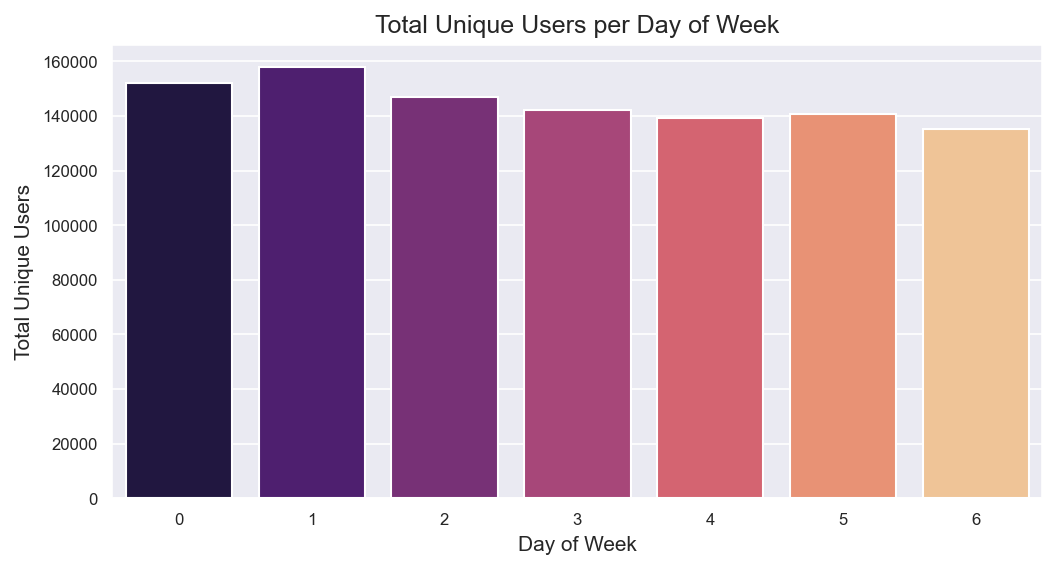

In [20]:
unique_users = orders.groupby('order_dow')['user_id'].nunique()
fig,ax = plt.subplots(figsize=(8,4),dpi=150)
ax = sns.barplot(x=unique_users.index,y=unique_users.values,palette='magma')
ax.set_xlabel('Day of Week',size = 10)
ax.set_ylabel('Total Unique Users',size=10)
ax.tick_params(axis='both',labelsize=8)
ax.set_title('Total Unique Users per Day of Week')
fig.savefig('Total Unique Users per Day of Week.png')
plt.show()

C:\Users\shirl\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


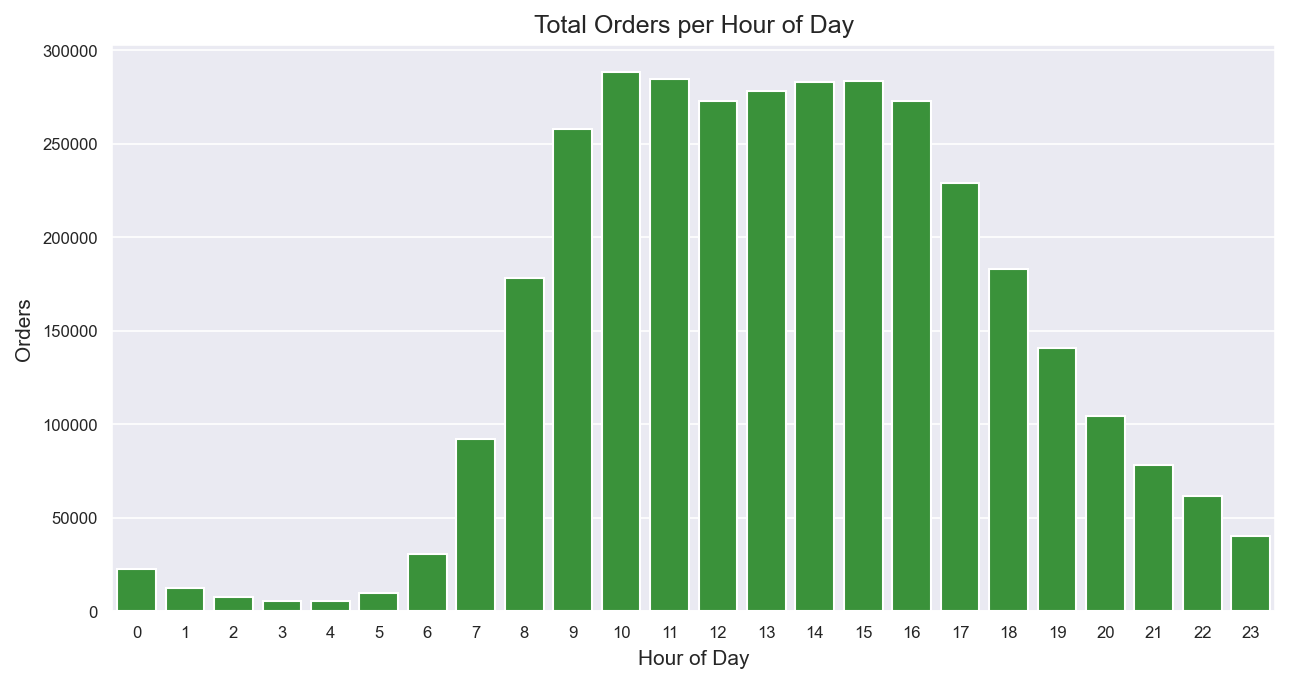

In [21]:
fig,ax = plt.subplots(figsize=(10,5),dpi=150)
ax = sns.countplot(orders.order_hour_of_day, color = color[2])
ax.set_xlabel('Hour of Day',size=10)
ax.set_ylabel('Orders',size=10)
ax.tick_params(axis='both',labelsize=8)
ax.set_title('Total Orders per Hour of Day')
plt.show()
fig.savefig('Total Orders per Hour of Day.png')

C:\Users\shirl\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


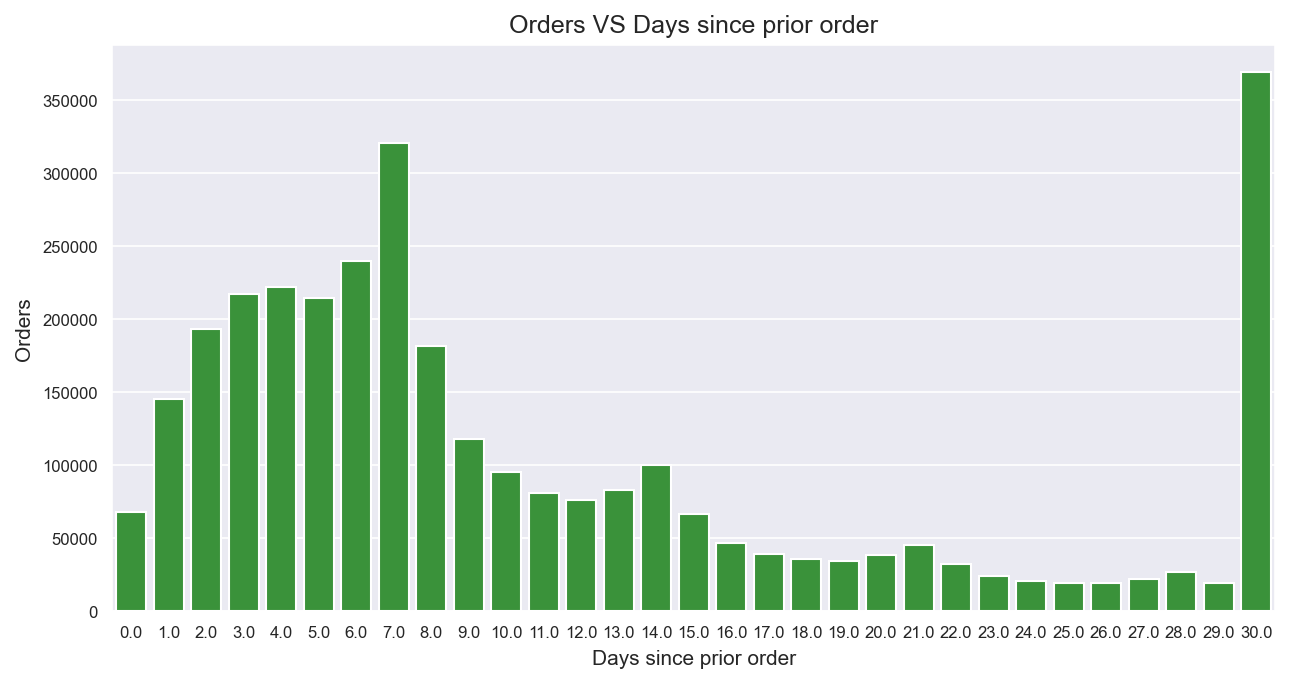

In [22]:
fig,ax = plt.subplots(figsize=(10,5),dpi=150)
ax = sns.countplot(orders.days_since_prior_order, color = color[2])
ax.set_xlabel('Days since prior order',size=10)
ax.set_ylabel('Orders',size=10)
ax.tick_params(axis='both',labelsize=8)
ax.set_title('Orders VS Days since prior order')
plt.show()
fig.savefig('Orders VS Days since prior order.png')

In [23]:
df = orders.groupby(['order_dow','order_hour_of_day'])['order_number'].aggregate('count').reset_index()
df = df.pivot('order_dow','order_hour_of_day','order_number')
df.head()

order_hour_of_day,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
order_dow,,,,,,,,,,,,,,,,,,,,,
0,3936,2398,1409,963,813,1168,3329,12410,28108,40798,...,54552,53954,49463,39753,29572,22654,18277,14423,11246,6887
1,3674,1830,1105,748,809,1607,5370,16571,34116,51908,...,46764,46403,44761,36792,28977,22145,16281,11943,8992,5620
2,3059,1572,943,719,744,1399,4758,13245,24635,36314,...,37173,37469,37541,32151,26470,20084,15039,10653,8146,5358
3,2952,1495,953,654,719,1355,4562,12396,22553,32312,...,34773,35990,35273,30368,25001,19249,13795,10278,8242,5181
4,2642,1512,899,686,730,1330,4401,12493,21814,31409,...,33625,34222,34093,29378,24425,19350,14186,10796,8812,5645


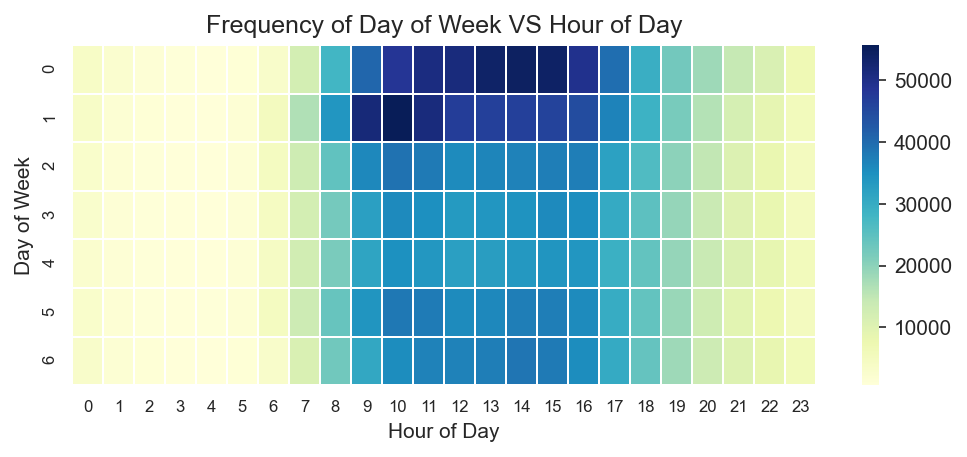

In [24]:
ax = plt.subplots(figsize=(8,3),dpi=150)
ax = sns.heatmap(df,cmap='YlGnBu',linewidth=.5)
ax.set_title('Frequency of Day of Week VS Hour of Day',size=12)
ax.set_xlabel('Hour of Day',size=10)
ax.set_ylabel('Day of Week',size=10)
ax.tick_params(axis='both',labelsize=8)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=10)
fig = ax.get_figure()
plt.show()
fig.savefig('Frequency of Day of Week VS Hour of Day.png')

##### order_products_prior dataset

In [25]:
order_products_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [26]:
order_products_prior.tail()

,order_id,product_id,add_to_cart_order,reordered
32434484,3421083,39678,6,1
32434485,3421083,11352,7,0
32434486,3421083,4600,8,0
32434487,3421083,24852,9,1
32434488,3421083,5020,10,1


In [27]:
len(order_products_prior.order_id.unique())

3214874

In [28]:
len(order_products_prior.product_id.unique())

49677

In [29]:
add_to_cart_order_prior = order_products_prior.groupby('order_id')['add_to_cart_order'].count()
add_to_cart_order_prior = add_to_cart_order_prior.value_counts()

In [30]:
add_to_cart_order_prior.head()

5    228330
6    227675
4    222081
7    220006
3    207027
Name: add_to_cart_order, dtype: int64

In [31]:
add_to_cart_order_prior.index.max()

145

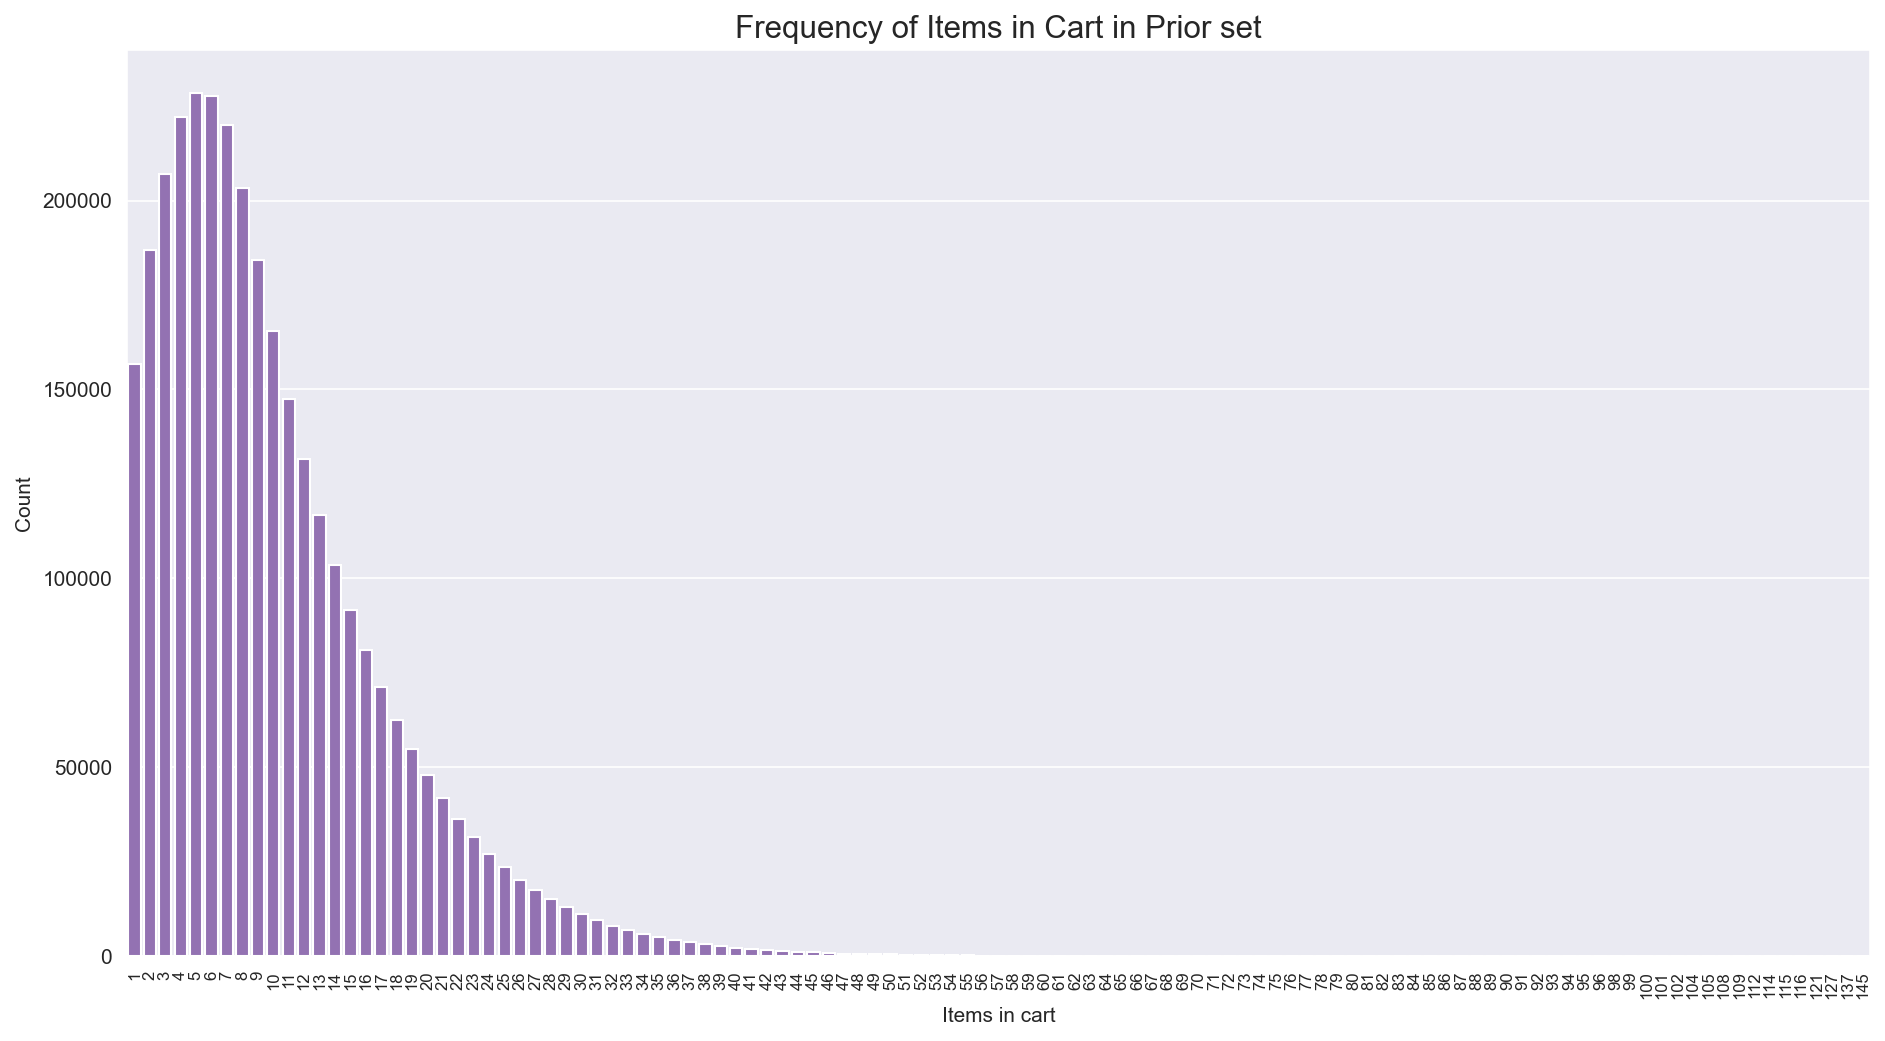

In [32]:
fig,ax = plt.subplots(figsize=(15,8),dpi=150)
ax = sns.barplot(x = add_to_cart_order_prior.index, y = add_to_cart_order_prior.values, color = color[4])
ax.set_xlabel('Items in cart')
ax.set_ylabel('Count')
ax.xaxis.set_tick_params(rotation=90,labelsize=8)
ax.set_title('Frequency of Items in Cart in Prior set',size=15)
plt.show()
fig.savefig('Frequency of Items in Cart in Prior set.png')

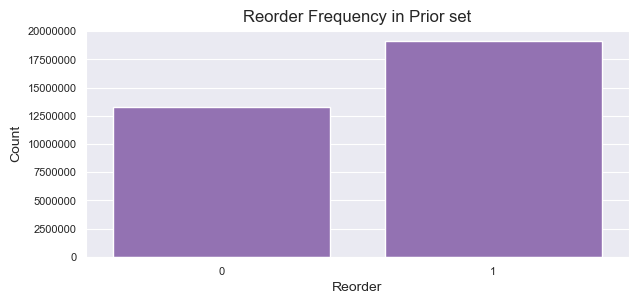

In [33]:
fig,ax = plt.subplots(figsize=(7,3),dpi=100)
ax = sns.barplot(x = order_products_prior.reordered.value_counts().index,
                y = order_products_prior.reordered.value_counts().values,
                 color = color[4])
ax.set_xlabel('Reorder',size=10)
ax.set_ylabel('Count',size=10)
ax.tick_params(axis='both',labelsize=8)
ax.ticklabel_format(style='plain',axis='y')
ax.set_title('Reorder Frequency in Prior set')
plt.show()
fig.savefig('Reorder Frequency in Prior set.png')

In [34]:
print('Percentage of reorder in prior set:',
     format(order_products_prior[order_products_prior.reordered == 1].shape[0]*100/order_products_prior.shape[0],'.2f'))

Percentage of reorder in prior set: 58.97


##### order_products_train dataset

In [35]:
order_products_train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [36]:
len(order_products_train.order_id.unique())

131209

In [37]:
len(order_products_train.product_id.unique())

39123

In [38]:
add_to_cart_order_train = order_products_prior.groupby('order_id')['add_to_cart_order'].count()
add_to_cart_order_train = add_to_cart_order_train.value_counts()

In [39]:
add_to_cart_order_train.head()

5    228330
6    227675
4    222081
7    220006
3    207027
Name: add_to_cart_order, dtype: int64

In [40]:
add_to_cart_order_train.index.max()

145

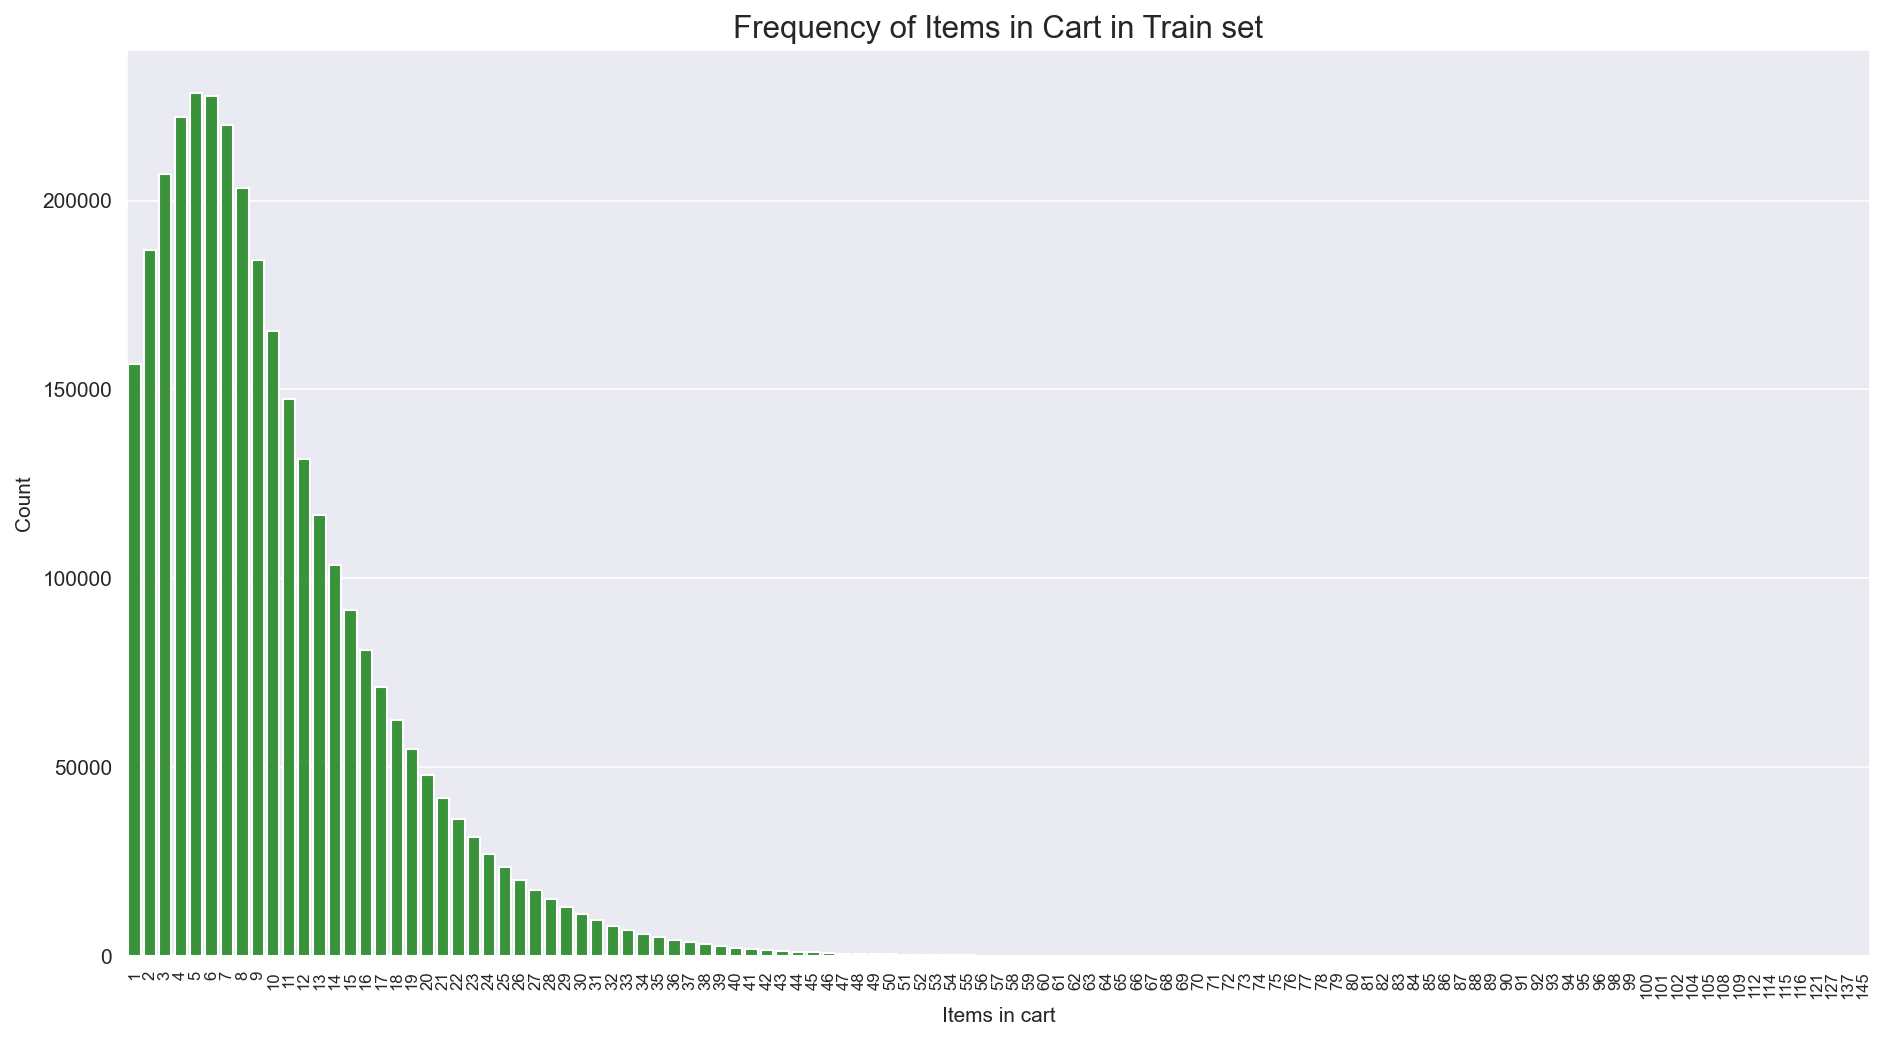

In [41]:
fig,ax = plt.subplots(figsize=(15,8),dpi=150)
ax = sns.barplot(x = add_to_cart_order_train.index, y = add_to_cart_order_train.values, color = color[2])
ax.set_xlabel('Items in cart')
ax.set_ylabel('Count')
ax.xaxis.set_tick_params(rotation=90, labelsize=8)
ax.set_title('Frequency of Items in Cart in Train set',size=15)
fig.savefig('Frequency of Items in Cart in Train set.png')

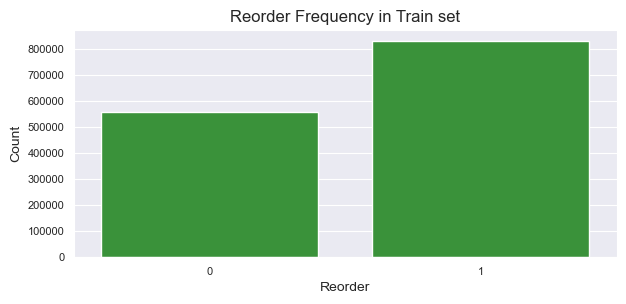

In [42]:
fig,ax = plt.subplots(figsize=(7,3),dpi=100)
ax = sns.barplot(x = order_products_train.reordered.value_counts().index,
                y = order_products_train.reordered.value_counts().values,
                 color = color[2])
ax.set_xlabel('Reorder',size=10)
ax.set_ylabel('Count',size=10)
ax.tick_params(axis='both',labelsize=8)
ax.ticklabel_format(style='plain',axis='y')
ax.set_title('Reorder Frequency in Train set')
plt.show()
fig.savefig('Reorder Frequency in Train set.png')

In [43]:
print('Percentage of reorder in train set:',
     format(order_products_train[order_products_train.reordered == 1].shape[0]*100/order_products_train.shape[0],'.2f'))

Percentage of reorder in train set: 59.86


##### products dataset

In [44]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [45]:
len(products.product_name.unique())

49688

In [46]:
len(products.aisle_id.unique())

134

In [47]:
len(products.department_id.unique())

21

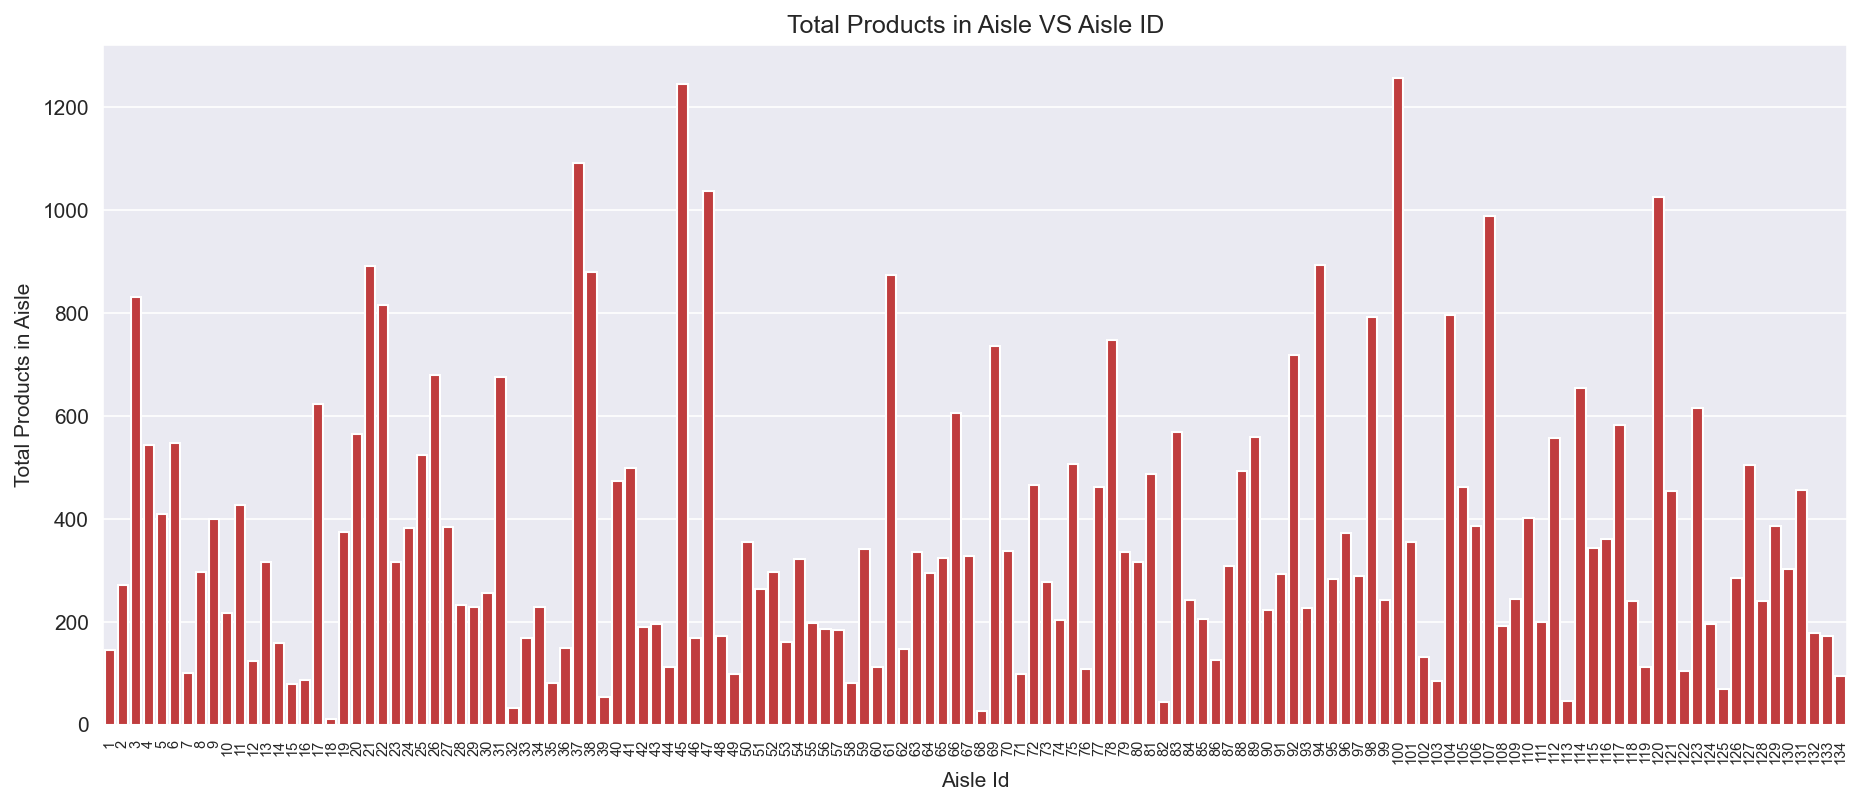

In [48]:
temp_df = products.groupby('aisle_id')['product_id'].count()
fig,ax = plt.subplots(figsize=(15,6),dpi=150)
ax = sns.barplot(x = temp_df.index, y = temp_df.values, color = color[3])
ax.set_xlabel('Aisle Id')
ax.set_ylabel('Total Products in Aisle')
ax.xaxis.set_tick_params(rotation=90,labelsize=7)
ax.set_title('Total Products in Aisle VS Aisle ID', size=12)
fig.savefig('Total Products in Aisle VS Aisle ID.png')

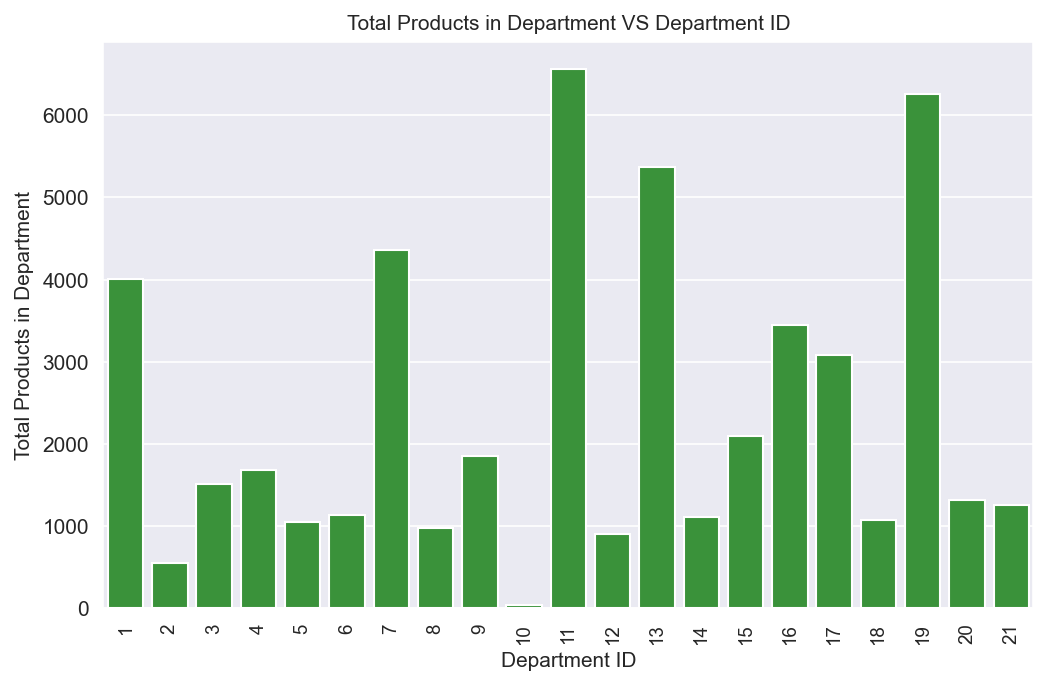

In [49]:
t_df = products.groupby('department_id')['product_id'].count()
fig,ax = plt.subplots(figsize=(8,5),dpi=150)
ax = sns.barplot(x = t_df.index, y = t_df.values, color = color[2])
ax.set_xlabel('Department ID')
ax.set_ylabel('Total Products in Department')
ax.xaxis.set_tick_params(rotation=90,labelsize=9)
ax.set_title('Total Products in Department VS Department ID', size=10)
fig.savefig('Total Products in Department VS Department ID.png')

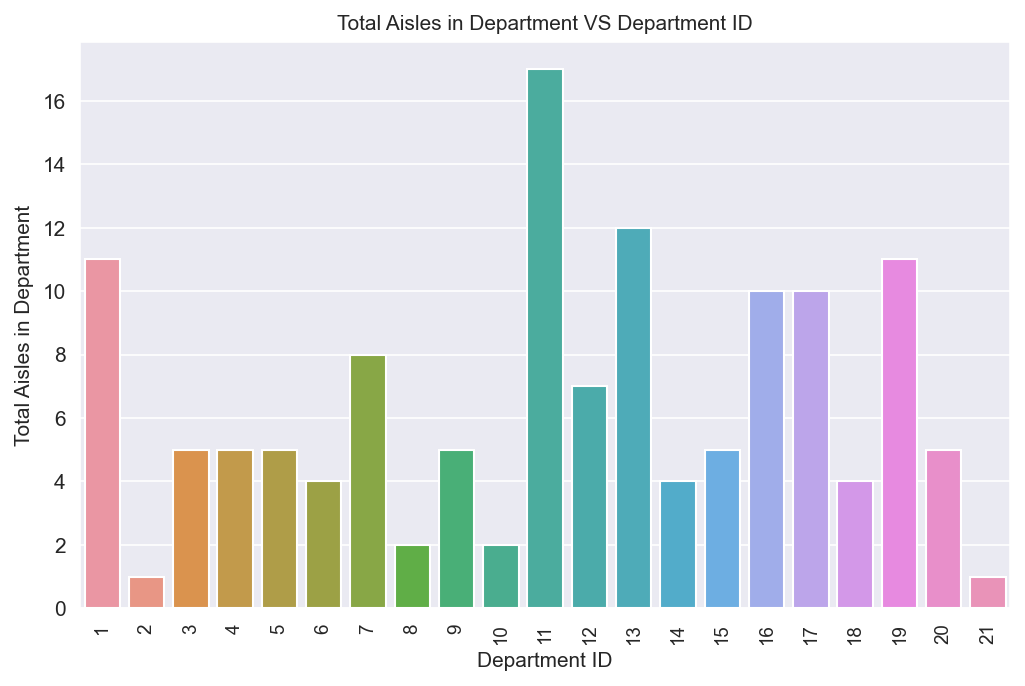

In [50]:
tem_df = products.groupby('department_id')['aisle_id'].nunique()
fig,ax = plt.subplots(figsize=(8,5),dpi=150)
ax = sns.barplot(x = tem_df.index, y = tem_df.values)
ax.set_xlabel('Department ID')
ax.set_ylabel('Total Aisles in Department')
ax.xaxis.set_tick_params(rotation=90,labelsize=9)
ax.set_title('Total Aisles in Department VS Department ID',size=10)
fig.savefig('Total Aisles in Department VS Department ID.png')